In [1]:
import numpy as np 
import pandas as pd 
import re

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
import pickle

'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


"\npd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)\npd.set_option('display.width', 1000)\npd.set_option('display.float_format', '{:,.5f}'.format)\n"

In [ ]:
#Notes
# Decrease Latitude, You go down
# Decrease Longitude, You go left


# Load Data

In [2]:
df= pickle.load(open('data/pca_dataset.pkl', "rb"))
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df.head()

,review_score,price,nearest_airport,ave_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,...,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,year_2019,year_2020,year_2021,year_2022
1,7.0,-0.571021,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,0,1,0,0,0,0,0,1
3,6.0,-1.197629,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,1,0,0,0,0,0,0,1
4,7.0,-0.571021,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,1,0,0,0,0,0,0,1
5,7.0,0.162917,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,1,0,0,0,0,0,0,0,1
7,7.0,0.162917,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.nearest_other

# Column Aggregation PCA

In [3]:
df_pca=df.dropna()
#df_pca.drop(columns=["height_m","weight_kg","base_total"],inplace=True)
df_pca

,review_score,price,nearest_airport,ave_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,...,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,year_2019,year_2020,year_2021,year_2022
1,7.0,-0.571021,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,0,1,0,0,0,0,0,1
3,6.0,-1.197629,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,1,0,0,0,0,0,0,1
4,7.0,-0.571021,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,1,0,0,0,0,0,0,1
5,7.0,0.162917,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,1,0,0,0,0,0,0,0,1
7,7.0,0.162917,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76495,1.0,0.364290,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,0,0,0,1
76510,10.0,0.780325,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,1,0,0,0
76511,10.0,0.513531,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,0,1,0,0
76515,10.0,0.513531,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# Get Features
X = df_pca

# Standardize Dataset
# for col in X.columns:
#     X[col] = StandardScaler().fit_transform(X[col].values.reshape(-1, 1))

# Create PCA
pca = PCA(n_components=X.shape[1])

# Fit Transform the Dataset
pca_X = pd.DataFrame(pca.fit_transform(X))

pca_X.head()

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,358
0,0.849259,-1.831610,1.895570,0.704752,-1.242898,-0.652899,-1.051513,-0.746410,1.038253,-0.807035,...,-3.629055e-15,3.218457e-15,5.080137e-16,1.297270e-15,-2.771587e-15,2.283757e-16,3.281275e-15,2.019730e-15,-1.006828e-15,-1.449497e-15
1,4.531114,0.084837,2.133333,1.244477,-1.293216,-0.763906,-0.915345,-0.567519,0.982534,-0.872155,...,-5.762653e-15,-5.480777e-16,7.321212e-15,-2.037811e-15,-1.019764e-15,6.147022e-15,2.303952e-15,1.605795e-15,5.353385e-16,-1.045860e-15
2,0.142592,-2.453397,1.700574,0.595646,-1.259227,-0.654754,-1.029045,-0.704700,0.988801,-0.806634,...,-7.453639e-16,-4.311777e-15,1.429899e-16,2.960090e-15,-2.444607e-15,-4.021496e-16,1.491934e-15,-3.509283e-16,9.244471e-16,-6.983720e-15
3,2.991419,0.234693,2.076040,0.981301,-1.215789,-0.427966,-1.099265,-0.720673,1.102080,-0.969120,...,4.815170e-15,-3.206003e-15,3.144280e-15,-3.536353e-15,-8.457580e-16,2.481720e-15,-4.444314e-15,-3.023434e-15,-6.137574e-16,-2.450924e-15
4,0.779318,-1.706441,1.658797,0.636606,-1.243962,-0.479144,-1.116873,-0.771838,1.058333,-0.885590,...,-3.528574e-15,1.952145e-14,8.196900e-15,-7.800777e-16,1.166704e-15,1.080484e-14,-2.294057e-15,1.900989e-16,2.763583e-15,1.705513e-15


In [5]:
pd.set_option('display.max_rows', 50)
cumsum_pca = pca.explained_variance_ratio_.cumsum()
component_matrix = pd.DataFrame(pca.components_, columns=X.columns, index=[f'pca_{i}' for i in range(len(cumsum_pca))]).T
component_matrix

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_349,pca_350,pca_351,pca_352,pca_353,pca_354,pca_355,pca_356,pca_357,pca_358
review_score,-0.605572,0.589836,0.491865,-0.028746,0.071988,0.048891,-0.003034,0.002574,-0.024403,0.004264,...,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
price,-0.096727,0.172446,-0.320756,-0.077915,-0.003119,0.229904,-0.086357,-0.041681,0.052928,-0.127192,...,3.045392e-18,9.496527e-18,-4.244668e-18,-2.121641e-17,4.869127e-17,-4.051730e-18,-2.493122e-18,3.512757e-17,6.243544e-18,-6.678685e-17
nearest_airport,-0.069024,0.051481,-0.140256,0.409193,0.111948,0.026914,0.004289,-0.260817,-0.042918,0.286281,...,3.846339e-17,1.262795e-16,-5.265737e-17,-2.050302e-17,6.252800e-17,-3.692829e-17,-4.598372e-17,-9.738809e-17,-5.871227e-18,-1.249308e-17
ave_airport,-0.073844,0.051663,-0.135036,0.424573,-0.072762,0.117858,0.121107,-0.140208,-0.131079,0.321221,...,-4.196289e-17,-1.278905e-16,4.972968e-17,9.562509e-18,-6.043764e-17,2.568154e-17,4.650065e-17,8.595642e-17,-7.893336e-18,1.307884e-16
nearest_resto,0.007272,-0.044304,0.062292,0.065097,0.069376,0.210690,0.202586,0.217822,0.782971,0.346333,...,-4.254748e-18,2.138823e-18,-8.694063e-18,-7.125104e-18,-5.028076e-18,1.101348e-17,-1.272169e-17,-2.773486e-17,-5.649044e-18,5.052166e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
month_name_September,0.000160,0.003562,0.000585,0.006049,0.000244,-0.002617,0.001623,0.001790,0.009476,-0.005077,...,-7.893110e-02,-3.124629e-02,5.832127e-03,1.139760e-03,7.133483e-03,8.919350e-04,-3.720680e-03,-3.760564e-03,-7.033913e-04,2.259702e-02
year_2019,-0.003343,-0.002030,-0.004865,-0.007892,0.000278,0.005861,-0.002733,0.003163,-0.015833,0.017177,...,-4.025492e-03,-6.073634e-03,-2.066356e-03,4.071685e-03,-2.131759e-03,-4.127742e-03,5.322139e-03,9.556663e-05,-7.092338e-05,-6.501125e-02
year_2020,-0.004048,-0.010093,-0.001981,-0.022391,0.010150,0.021117,-0.026720,0.009432,-0.039275,0.025121,...,-4.025492e-03,-6.073634e-03,-2.066356e-03,4.071685e-03,-2.131759e-03,-4.127742e-03,5.322139e-03,9.556663e-05,-7.092338e-05,-6.501125e-02
year_2021,0.026782,0.002545,0.022642,0.005978,0.012730,0.008751,-0.019574,-0.022874,0.004584,-0.006790,...,-4.025492e-03,-6.073634e-03,-2.066356e-03,4.071685e-03,-2.131759e-03,-4.127742e-03,5.322139e-03,9.556663e-05,-7.092338e-05,-6.501125e-02


In [6]:
component_matrix.to_csv("pca.csv")

In [12]:
display=pd.DataFrame(pca.explained_variance_ratio_.cumsum()).head(6)
display["Diff"]=display[0].diff()
display

,0,Diff
0,0.162469,NaN
1,0.286651,0.124182
2,0.385113,0.098463
3,0.438686,0.053573
4,0.489863,0.051177
5,0.528423,0.038560


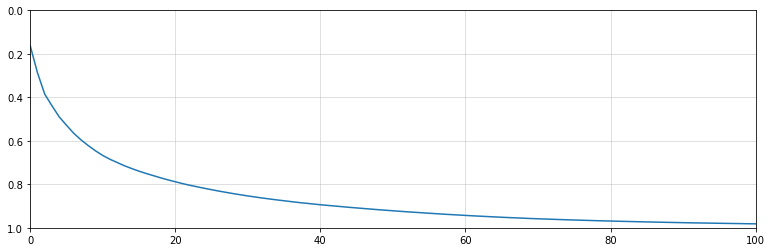

In [14]:
evr = pca.explained_variance_ratio_
cumsum_pca = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(13, 4))
plt.plot([i for i in range(len(cumsum_pca))], cumsum_pca)
plt.grid(True, alpha=0.5)
plt.ylim([1, 0])
plt.xlim([0, 100])
plt.show()